### IMPORTING LIBRARIES AND MODULES

In [1]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import descartes
import geopandas as gdp
from shapely.geometry import Point,Polygon
%matplotlib inline
import coordinates as coor
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('911_Police_Calls_for_Service.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233397 entries, 0 to 233396
Data columns (total 17 columns):
RecordID                       233397 non-null int64
CallNumber                     233397 non-null object
CallDateTime                   233397 non-null object
Priority                       233397 non-null object
District                       233397 non-null object
Description                    233397 non-null object
IncidentLocation               233397 non-null object
ZipCode                        229318 non-null float64
Neighborhood                   229360 non-null object
PoliceDistrict                 229361 non-null object
PolicePost                     229361 non-null float64
CouncilDistrict                229365 non-null float64
SheriffDistricts               229361 non-null object
Community_Statistical_Areas    229285 non-null object
Census_Tracts                  229358 non-null object
VRIZones                       38038 non-null object
Location                

## Extracting the Latitude and Longitude from the Location column

In [4]:
df1=df['Location']
loc=df1.str.split("(",expand=True)
coord=loc[1]
lat_lon=coord.str.split(",",expand=True)
lat_lon[1]=lat_lon[1].str.replace(r"\)","")

In [5]:
df=pd.concat([df,lat_lon],axis=1) ## Concatening the lat and lon columns to the dataframe

In [6]:
df.rename(columns={0:'latitude',1:'longitude'}, inplace=True)

In [7]:
df.head()

,RecordID,CallNumber,CallDateTime,Priority,District,Description,IncidentLocation,ZipCode,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,VRIZones,Location,latitude,longitude
0,7484146,P200610001,03/01/2020 12:00:00 AM,High,NE,SHOOTING,7100 MCCLEAN BL,21234.0,Hamilton Hills,Northeastern,423.0,3.0,D3,Harford/Echodale,Census Tract 2707.01,NaN,"7100 MCCLEAN\nBL BALTIMORE, MD\n(39.371109, -7...",39.371109,-76.567006
1,7484060,P200610003,03/01/2020 12:01:00 AM,Non-Emergency,ND,Traffic Stop,400 E 25TH ST,21218.0,Harwood,Northern,513.0,12.0,D2,Greater Charles Village/Barclay,Census Tract 1203,NaN,"400 E 25TH ST\nBALTIMORE, MD\n(39.318041, -76....",39.318041,-76.610957
2,7484076,P200610002,03/01/2020 12:01:00 AM,Non-Emergency,NE,COMMUNITY ENGAGE,4200 SHELDON AV,21206.0,Belair-Edison,Northeastern,442.0,2.0,D4,Cedonia/Frankford,Census Tract 2602.02,Northeastern,"4200 SHELDON AV\nBALTIMORE, MD\n(39.328574, -7...",39.328574,-76.564668
3,7484167,P200610005,03/01/2020 12:02:00 AM,Non-Emergency,ED,COMMUNITY ENGAGE,2300 HARFORD RD,21218.0,East Baltimore Midway,Eastern,342.0,12.0,D5,Midway/Coldstream,Census Tract 908,Eastern1,"2300 HARFORD RD\nBALTIMORE, MD\n(39.315867, -7...",39.315867,-76.596226
4,7483940,P200610014,03/01/2020 12:02:00 AM,High,NE,SHOOTING,7100 MCCLEAN BL,21234.0,Hamilton Hills,Northeastern,423.0,3.0,D3,Harford/Echodale,Census Tract 2707.01,NaN,"7100 MCCLEAN\nBL BALTIMORE, MD\n(39.371109, -7...",39.371109,-76.567006


##  MISSING DATA

#### Plotting Heat map to visualize the missing values

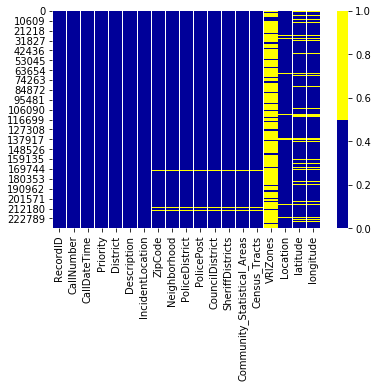

In [8]:
colours = ['#000099', '#ffff00'] # yellow is missing. blue is not missing.
sns.heatmap(df[:].isnull(), cmap=sns.color_palette(colours))

#### Percentage of missing values of each column

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

RecordID - 0.0%
CallNumber - 0.0%
CallDateTime - 0.0%
Priority - 0.0%
District - 0.0%
Description - 0.0%
IncidentLocation - 0.0%
ZipCode - 1.7476659939930677%
Neighborhood - 1.7296709040818863%
PoliceDistrict - 1.7292424495601915%
PolicePost - 1.7292424495601915%
CouncilDistrict - 1.7275286314734122%
SheriffDistricts - 1.7292424495601915%
Community_Statistical_Areas - 1.7618049932089956%
Census_Tracts - 1.730527813125276%
VRIZones - 83.70244690377339%
Location - 1.703535178258504%
latitude - 14.22083402957193%
longitude - 14.22083402957193%


### Assigning coordinates approximately for missing latitudes and longitudes based on their respective ZipCode

In [10]:
for i in df.index:
    if df['latitude'][i] == None and df['ZipCode'][i] != 'NaN':
        df['latitude'][i],df['longitude'][i]=coor.coordinates(df['ZipCode'][i])
    else:
        continue

#### Percentage of missing values after assigning values for latitude and logitude columns

In [11]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing*100))

RecordID - 0.0%
CallNumber - 0.0%
CallDateTime - 0.0%
Priority - 0.0%
District - 0.0%
Description - 0.0%
IncidentLocation - 0.0%
ZipCode - 1.7476659939930677%
Neighborhood - 1.7296709040818863%
PoliceDistrict - 1.7292424495601915%
PolicePost - 1.7292424495601915%
CouncilDistrict - 1.7275286314734122%
SheriffDistricts - 1.7292424495601915%
Community_Statistical_Areas - 1.7618049932089956%
Census_Tracts - 1.730527813125276%
VRIZones - 83.70244690377339%
Location - 1.703535178258504%
latitude - 1.703535178258504%
longitude - 1.703535178258504%


In [12]:
# While extracting the coordinates based on delimeter from location column,some values are extracted other than latitude and longitudinal values so,I have cleaned the data based on index.
# print(df[df['longitude']==' MD'].index.values)
# print(df[df['longitude']==' MD\n'].index.values)
df = df.drop([22701,35777,55995,59459,85983,173335,178514,11040,11051,11221,18176,155412,193253,232259])

## INCONSISTENT DATA

#### Changing the data types of the columns 

In [13]:
df['CallDateTime'] = pd.to_datetime(df['CallDateTime']) # Converting the type of CallDateTime from object to timestamp
df["longitude"] = pd.to_numeric(df["longitude"]) # Converting the type of longitude from object to float
df["latitude"] = pd.to_numeric(df["latitude"]) # Converting the type of latitude from object to float

#### Converting the categorical data to lower case for consistency while doing analysis

In [14]:
df['Description'] = df['Description'].str.lower()
df['PoliceDistrict'] = df['PoliceDistrict'].str.lower()

## IRRELAVENT DATA

#### Dropping the Irrelavent columns that are not neccessay for the analysis

In [15]:
cols_to_drop = ['RecordID','CallNumber','IncidentLocation','Neighborhood','PolicePost','CouncilDistrict','Community_Statistical_Areas','Census_Tracts','VRIZones','Location']
df = df.drop(cols_to_drop, axis=1)

In [16]:
df.head()

,CallDateTime,Priority,District,Description,ZipCode,PoliceDistrict,SheriffDistricts,latitude,longitude
0,2020-03-01 00:00:00,High,NE,shooting,21234.0,northeastern,D3,39.371109,-76.567006
1,2020-03-01 00:01:00,Non-Emergency,ND,traffic stop,21218.0,northern,D2,39.318041,-76.610957
2,2020-03-01 00:01:00,Non-Emergency,NE,community engage,21206.0,northeastern,D4,39.328574,-76.564668
3,2020-03-01 00:02:00,Non-Emergency,ED,community engage,21218.0,eastern,D5,39.315867,-76.596226
4,2020-03-01 00:02:00,High,NE,shooting,21234.0,northeastern,D3,39.371109,-76.567006


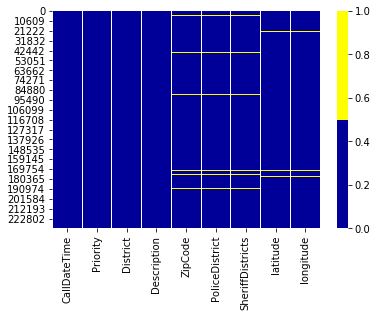

In [17]:
colours = ['#000099', '#ffff00'] # yellow is missing. blue is not missing.
sns.heatmap(df[:].isnull(), cmap=sns.color_palette(colours))

#### Dropping remaining null values

In [18]:
df = df.dropna()

##### Since the latitude and Longitude are recorded based on the GPS of the mobile, there are some calls that are outside from the Baltimore city. Dropping the lat and lon where the calls are received from outside of Baltimore city to get accurate results.

In [19]:
df = df.drop(df[df['latitude']>40].index)
df = df.drop(df[df['longitude']>-75].index)
df = df.drop(df[df['longitude']<-80].index)
df = df.drop(df[df['latitude']<38].index)

#  ANALYSIS

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223824 entries, 0 to 233396
Data columns (total 9 columns):
CallDateTime        223824 non-null datetime64[ns]
Priority            223824 non-null object
District            223824 non-null object
Description         223824 non-null object
ZipCode             223824 non-null float64
PoliceDistrict      223824 non-null object
SheriffDistricts    223824 non-null object
latitude            223824 non-null float64
longitude           223824 non-null float64
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 17.1+ MB


In [21]:
df['Priority'].value_counts()

Non-Emergency     137372
Medium             39954
Low                35165
High               11294
Emergency             27
Out of Service        12
Name: Priority, dtype: int64

In [22]:
df['Description'].value_counts().head(10)

business check    90495
foot  patrol      17058
disorderly        13862
911/no  voice     11684
narcotics          7071
traffic stop       6948
common assault     5335
other              4400
silent alarm       3996
auto accident      3950
Name: Description, dtype: int64

### Plotting the Hourly 911 call volume for the data

[Text(0, 0.5, 'Number of Calls'), Text(0.5, 0, 'Hour')]

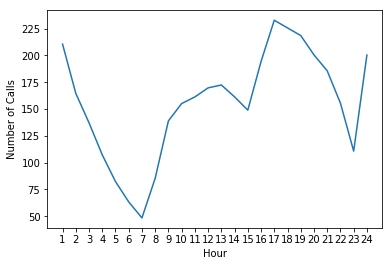

In [23]:
df['hourly_calls'] = df.CallDateTime.dt.hour
byhour = df.groupby('hourly_calls').count()
byhour = byhour/60
x=[_ for _ in range(1,25)]
plt.xticks(x)
ax = sns.lineplot(x=x, y="CallDateTime", data=byhour)
ax.set(xlabel='Hour', ylabel='Number of Calls')

### Countplot for calls received from Zipcodes with priority as a hue

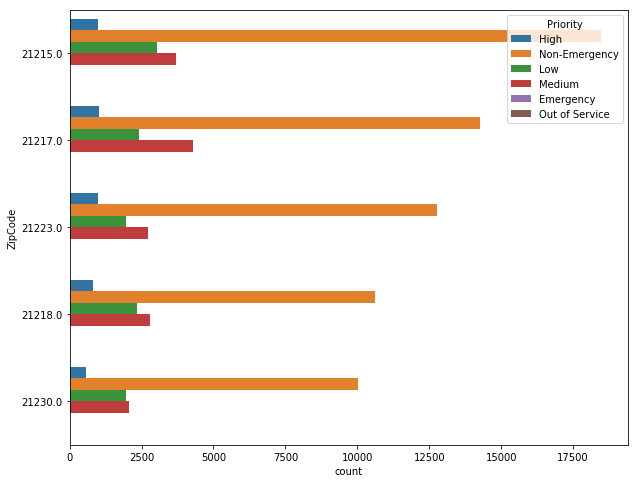

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.countplot(y=df.ZipCode, data=df, hue='Priority',order=df.ZipCode.value_counts().iloc[:5].index)


### Countplot for PoliceDistrict with hue as Priority of the call

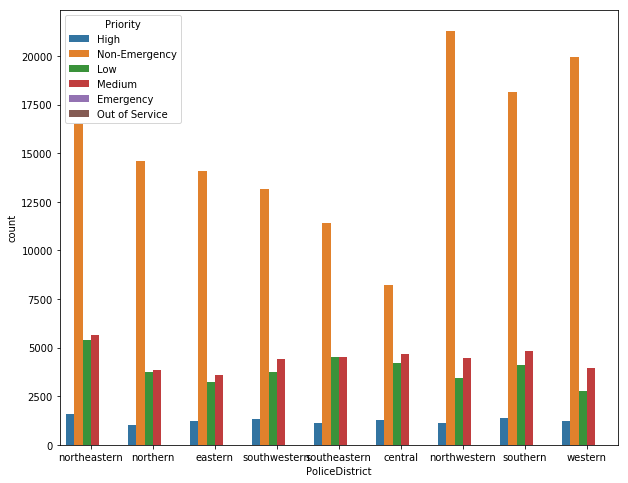

In [25]:
plt.figure(figsize=(10, 8))
sns.countplot(x=df.PoliceDistrict, data=df, hue='Priority')

### Plotting the latitude and Longitude values by overlapping the values on the Baltimore city shape file

In [26]:
street_map = gdp.read_file('tl_2014_24_cousub.shp') ## Reading the Baltimore city shape file

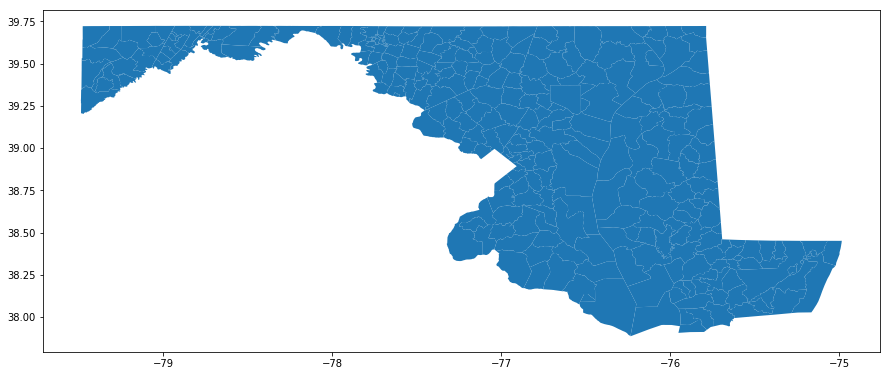

In [27]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)

In [28]:
geometry = [Point(xy) for xy in zip(df['longitude'],df['latitude'])] # Zipping the lat and lon values
crs={'init':'epsg:4326'}

In [29]:
geo_df = gdp.GeoDataFrame(df,crs=crs,geometry=geometry)
geo_df.head()

,CallDateTime,Priority,District,Description,ZipCode,PoliceDistrict,SheriffDistricts,latitude,longitude,hourly_calls,geometry
0,2020-03-01 00:00:00,High,NE,shooting,21234.0,northeastern,D3,39.371109,-76.567006,0,POINT (-76.56701 39.37111)
1,2020-03-01 00:01:00,Non-Emergency,ND,traffic stop,21218.0,northern,D2,39.318041,-76.610957,0,POINT (-76.61096 39.31804)
2,2020-03-01 00:01:00,Non-Emergency,NE,community engage,21206.0,northeastern,D4,39.328574,-76.564668,0,POINT (-76.56467 39.32857)
3,2020-03-01 00:02:00,Non-Emergency,ED,community engage,21218.0,eastern,D5,39.315867,-76.596226,0,POINT (-76.59623 39.31587)
4,2020-03-01 00:02:00,High,NE,shooting,21234.0,northeastern,D3,39.371109,-76.567006,0,POINT (-76.56701 39.37111)


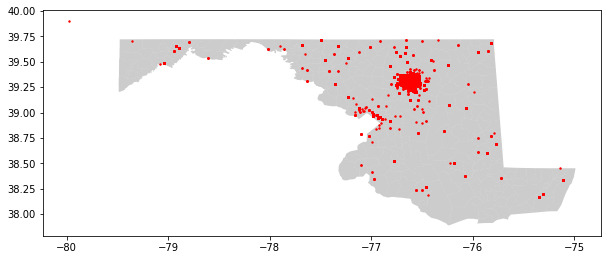

In [30]:
fig,ax = plt.subplots(figsize=(10,10))
street_map.plot(ax=ax ,alpha = 0.4,color='grey')
geo_df.plot(ax=ax,markersize=2,color="red")